In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
lis=['SI', 'Pstation', 'Name', 'Age', 'FIR', 'FIRDate', 'NamePol', 'Place', 'Medal', 'Accused']

In [3]:
frames=[]

In [4]:
def preprocess():
    for i in range(1,19):
        df=pd.read_csv("Arrest1_"+str(i)+".csv")
        for c in lis:
            df.drop(c, axis=1, inplace=True)
        l=len(df.index)
        for i in range(4):
            for j in range(l):
                df[df.columns[i]][j]=str(df[df.columns[i]][j])
                df[df.columns[i]][j]=df[df.columns[i]][j].replace("\n", " ")
        frames.append(df)    

In [5]:
preprocess()

In [6]:
fds=pd.concat(frames)

In [7]:
fds

,District,Address,Crime,Timestamp
0,CENTRAL,"H. NO 3355, GAURIA MATH GALI PAHARGANJ, PAHAR ...",356/379/411 IPC 1860,03-02-2019 22:20
1,CENTRAL,"3188, FATAK TELIYAN, TURKMAN GATE, DELHI, CHAN...",323/341/506 IPC 1860,04-02-2019 03:00
2,CENTRAL,"310, C- BLOCK, AGAR NAGAR, PREM NAGAR-2, KIRAR...",283/290 IPC 1860,03-02-2019 21:00
3,CENTRAL,"937, GALI MANDIR WALI, PAHAR GANJ, CENTRAL, DE...",93/97 DELHI POLICE ACT 1978,03-02-2019 22:00
4,CENTRAL,"3577, CHOWK KASERUWALAN, PAHAR GANJ. CENTRAL, ...",93/97 DELHI POLICE ACT 1978,03-02-2019 22:00
5,DWARKA,"RZ-20B, GUPTA MARKET, NEAR ANAJ MANDI, NAJAFGA...","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:38
0,DWARKA,"WZ-50C, PALAM VILLAGE, NEW DELHI, DWARKA NORTH...",93/97 DELHI POLICE ACT 1978,03-02-2019 23:00
1,DWARKA,"C-63, RAGHUVEER ENCLAVE, NAJAFGARH, BABA HARID...","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:24
2,DWARKA,"RZ-72, PHASE-III, V&A BLOCK, PREM NAGAR NAJAFG...","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:38
3,DWARKA,"VPO KAIR, NEW DELHI, DWARKA, DELHI, INDIA","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:24


In [8]:
fds.reset_index(inplace=True, drop=True)

In [9]:
fds

,District,Address,Crime,Timestamp
0,CENTRAL,"H. NO 3355, GAURIA MATH GALI PAHARGANJ, PAHAR ...",356/379/411 IPC 1860,03-02-2019 22:20
1,CENTRAL,"3188, FATAK TELIYAN, TURKMAN GATE, DELHI, CHAN...",323/341/506 IPC 1860,04-02-2019 03:00
2,CENTRAL,"310, C- BLOCK, AGAR NAGAR, PREM NAGAR-2, KIRAR...",283/290 IPC 1860,03-02-2019 21:00
3,CENTRAL,"937, GALI MANDIR WALI, PAHAR GANJ, CENTRAL, DE...",93/97 DELHI POLICE ACT 1978,03-02-2019 22:00
4,CENTRAL,"3577, CHOWK KASERUWALAN, PAHAR GANJ. CENTRAL, ...",93/97 DELHI POLICE ACT 1978,03-02-2019 22:00
5,DWARKA,"RZ-20B, GUPTA MARKET, NEAR ANAJ MANDI, NAJAFGA...","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:38
6,DWARKA,"WZ-50C, PALAM VILLAGE, NEW DELHI, DWARKA NORTH...",93/97 DELHI POLICE ACT 1978,03-02-2019 23:00
7,DWARKA,"C-63, RAGHUVEER ENCLAVE, NAJAFGARH, BABA HARID...","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:24
8,DWARKA,"RZ-72, PHASE-III, V&A BLOCK, PREM NAGAR NAJAFG...","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:38
9,DWARKA,"VPO KAIR, NEW DELHI, DWARKA, DELHI, INDIA","40(b) DELHI EXCISE ACT, 2009",03-02-2019 20:24


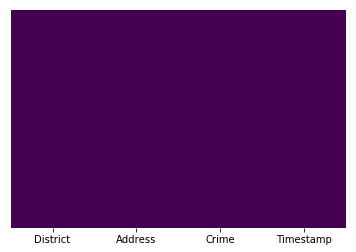

In [10]:
sns.heatmap(fds.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
fds.to_csv("GeoDataSet.csv")